In [1321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [1322]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [1323]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [1324]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565321 entries, 0 to 1565320
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1565321 non-null  int64  
 1   kWh       1565321 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 23.9 MB


In [1325]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1565316    2.29
1565317    2.28
1565318    2.28
1565319    0.37
1565320    0.13
Name: kWh, Length: 1565321, dtype: float64

In [1326]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1565316    2.29
1565317    2.28
1565318    2.28
1565319    0.37
1565320    0.13
Name: kWh, Length: 1565321, dtype: float64

In [1327]:
l=len(conso_data)-1
l

1565320

In [1328]:
conso_data['sec']=conso_data['Interval']/1000


In [1329]:
conso_data['Wh']=3600000/conso_data['Interval']


In [1330]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [1331]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565321 entries, 0 to 1565320
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1565321 non-null  int64  
 1   kWh        1565321 non-null  float64
 2   sec        1565321 non-null  float64
 3   Wh         1565321 non-null  float64
 4   cumul(ms)  1565321 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 59.7 MB


In [1332]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1565316,1575,2.29,1.575,2285.714286,38760520501
1565317,1576,2.28,1.576,2284.263959,38760522077
1565318,1577,2.28,1.577,2282.815472,38760523654
1565319,9746,0.37,9.746,369.382311,38760533400
1565320,27638,0.13,27.638,130.255445,38760561038


In [1333]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

38760561038000

In [1334]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 18, 53, 38, 786101)

In [1335]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [1336]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [1337]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]



In [1338]:
conso_data['dates']

0         2023-08-21 18:54:00.720101
1         2023-08-21 18:54:22.578101
2         2023-08-21 18:54:44.579101
3         2023-08-21 18:55:06.507101
4         2023-08-21 18:55:28.398101
                     ...            
1565316   2024-11-12 09:42:19.287101
1565317   2024-11-12 09:42:20.863101
1565318   2024-11-12 09:42:22.440101
1565319   2024-11-12 09:42:32.186101
1565320   2024-11-12 09:42:59.824101
Name: dates, Length: 1565321, dtype: datetime64[ns]

## créer les dates

In [1339]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:54:00.720101,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:54:22.578101,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:54:44.579101,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:55:06.507101,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:55:28.398101,21/08/23
...,...,...,...,...,...,...,...
1565316,1575,2.29,1.575,2285.714286,38760520501,2024-11-12 09:42:19.287101,12/11/24
1565317,1576,2.28,1.576,2284.263959,38760522077,2024-11-12 09:42:20.863101,12/11/24
1565318,1577,2.28,1.577,2282.815472,38760523654,2024-11-12 09:42:22.440101,12/11/24
1565319,9746,0.37,9.746,369.382311,38760533400,2024-11-12 09:42:32.186101,12/11/24


### save conso_data with dates

In [1340]:
#to_csv(r'../conso_data_with_dates.csv',conso_data)

# tranche journalière


In [1341]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('12/11/24', 12, 11, 2024)

In [1342]:
here = now.strftime('%H:%M:%S')
here

'09:43:25'

In [1343]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [1344]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1032 entries, 1564289 to 1565320
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1032 non-null   int64         
 1   kWh        1032 non-null   float64       
 2   sec        1032 non-null   float64       
 3   Wh         1032 non-null   float64       
 4   cumul(ms)  1032 non-null   int64         
 5   dates      1032 non-null   datetime64[ns]
 6   days       1032 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 64.5+ KB


In [1345]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [1346]:
data = list(df_grp['kWh'])
print(data)

[0.858, 3.7, 4.23, 3.686, 4.193, 4.624, 3.505, 3.402, 3.529, 3.684, 3.805, 3.753, 4.258, 3.83, 3.441, 3.638, 3.325, 3.433, 4.249, 4.0, 4.052, 3.918, 3.437, 4.472, 3.717, 3.768, 4.42, 4.667, 3.767, 3.217, 3.178, 4.022, 3.651, 3.18, 3.795, 4.173, 3.738, 3.563, 4.794, 4.176, 4.546, 3.772, 3.396, 4.31, 3.876, 3.874, 3.435, 4.076, 3.652, 3.402, 4.123, 3.389, 3.891, 3.834, 3.644, 3.752, 4.242, 3.293, 3.873, 2.968, 2.056, 2.047, 2.461, 4.09, 3.734, 4.325, 3.63, 3.9, 3.752, 3.939, 3.959, 4.127, 3.631, 3.168, 3.799, 3.551, 3.59, 3.7, 3.689, 3.235, 3.91, 3.26, 3.749, 3.594, 4.09, 3.607, 3.339, 3.825, 4.062, 4.384, 4.082, 3.998, 4.222, 3.75, 3.923, 3.871, 3.912, 3.751, 4.04, 4.341, 3.885, 3.505, 3.683, 3.674, 3.338, 3.852, 3.99, 4.108, 3.475, 4.172, 3.608, 4.105, 4.514, 3.684, 3.423, 3.578, 4.183, 3.673, 4.08, 3.981, 3.746, 3.59, 5.133, 3.699, 3.76, 4.304, 4.091, 4.754, 4.393, 3.963, 3.791, 4.363, 4.663, 4.216, 4.782, 4.338, 3.688, 4.215, 3.69, 3.627, 3.523, 3.96, 3.655, 3.788, 3.586, 3.492, 3.92

In [1347]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [1348]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [1349]:
df = conso_data
len(df)

1565321

In [1350]:
period(p=2)

2023-08-22 01:00:14.523101	2023-08-22 08:04:30.143101	7h 4m 15s 	2000


In [1351]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.291952
dtype: float64

In [1352]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.478491
dtype: float64

In [1353]:
last=df_grp.iloc[-1]['kWh']
last

1.032

In [1354]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1032 entries, 1564289 to 1565320
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1032 non-null   int64         
 1   kWh        1032 non-null   float64       
 2   sec        1032 non-null   float64       
 3   Wh         1032 non-null   float64       
 4   cumul(ms)  1032 non-null   int64         
 5   dates      1032 non-null   datetime64[ns]
 6   days       1032 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 64.5+ KB


In [1355]:
# select day
day = today
#day = '16/08/24'


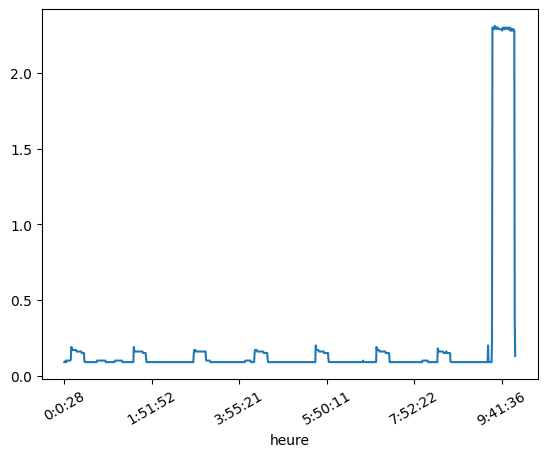

In [1356]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [1357]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:54:00.720101,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:54:22.578101,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:54:44.579101,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:55:06.507101,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:55:28.398101,21/08/23
...,...,...,...,...,...,...,...
1565316,1575,2.29,1.575,2285.714286,38760520501,2024-11-12 09:42:19.287101,12/11/24
1565317,1576,2.28,1.576,2284.263959,38760522077,2024-11-12 09:42:20.863101,12/11/24
1565318,1577,2.28,1.577,2282.815472,38760523654,2024-11-12 09:42:22.440101,12/11/24
1565319,9746,0.37,9.746,369.382311,38760533400,2024-11-12 09:42:32.186101,12/11/24


In [1358]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:28,39345,0.09,39.345,91.498284,38725609552,2024-11-12 00:00:28.338101,12/11/24
0:1:7,39223,0.09,39.223,91.782882,38725648775,2024-11-12 00:01:07.561101,12/11/24
0:1:45,37749,0.09,37.749,95.366765,38725686524,2024-11-12 00:01:45.310101,12/11/24
0:2:21,36342,0.10,36.342,99.058940,38725722866,2024-11-12 00:02:21.652101,12/11/24
0:2:59,37635,0.09,37.635,95.655640,38725760501,2024-11-12 00:02:59.287101,12/11/24
...,...,...,...,...,...,...,...
9:42:19,1575,2.29,1.575,2285.714286,38760520501,2024-11-12 09:42:19.287101,12/11/24
9:42:20,1576,2.28,1.576,2284.263959,38760522077,2024-11-12 09:42:20.863101,12/11/24
9:42:22,1577,2.28,1.577,2282.815472,38760523654,2024-11-12 09:42:22.440101,12/11/24


In [1359]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 02/11/24 4.085
Min : 13/10/24 1.785


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1564289,39345,0.09,39.345,91.498284,38725609552,2024-11-12 00:00:28.338101,12/11/24,0:0:28
1564290,39223,0.09,39.223,91.782882,38725648775,2024-11-12 00:01:07.561101,12/11/24,0:1:7
1564291,37749,0.09,37.749,95.366765,38725686524,2024-11-12 00:01:45.310101,12/11/24,0:1:45
1564292,36342,0.10,36.342,99.058940,38725722866,2024-11-12 00:02:21.652101,12/11/24,0:2:21
1564293,37635,0.09,37.635,95.655640,38725760501,2024-11-12 00:02:59.287101,12/11/24,0:2:59
...,...,...,...,...,...,...,...,...
1565316,1575,2.29,1.575,2285.714286,38760520501,2024-11-12 09:42:19.287101,12/11/24,9:42:19
1565317,1576,2.28,1.576,2284.263959,38760522077,2024-11-12 09:42:20.863101,12/11/24,9:42:20
1565318,1577,2.28,1.577,2282.815472,38760523654,2024-11-12 09:42:22.440101,12/11/24,9:42:22
1565319,9746,0.37,9.746,369.382311,38760533400,2024-11-12 09:42:32.186101,12/11/24,9:42:32


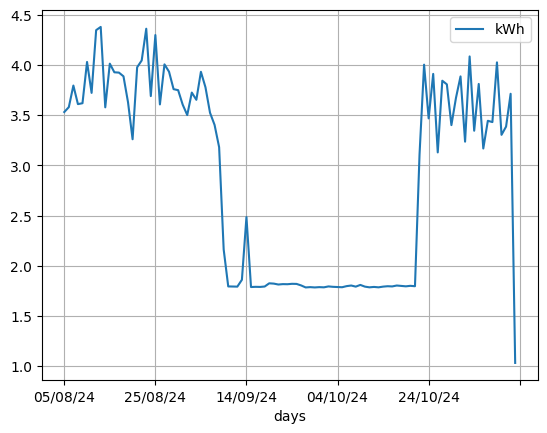

In [1360]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-11-12 00:00:28.338101	2024-11-12 09:41:35.288101	9h 41m 6s 	1000
2024-11-12 09:41:35.288101	2024-11-12 09:42:59.824101	0h 1m 24s 	32
<class 'pandas.core.frame.DataFrame'>
Index: 1032 entries, 1564289 to 1565320
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1032 non-null   int64         
 1   kWh        1032 non-null   float64       
 2   sec        1032 non-null   float64       
 3   Wh         1032 non-null   float64       
 4   cumul(ms)  1032 non-null   int64         
 5   dates      1032 non-null   datetime64[ns]
 6   days       1032 non-null   object        
 7   heure      1032 non-null   object        
 8   hours      1032 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 80.6+ KB


('12/11/24', <Axes: xlabel='hours'>)

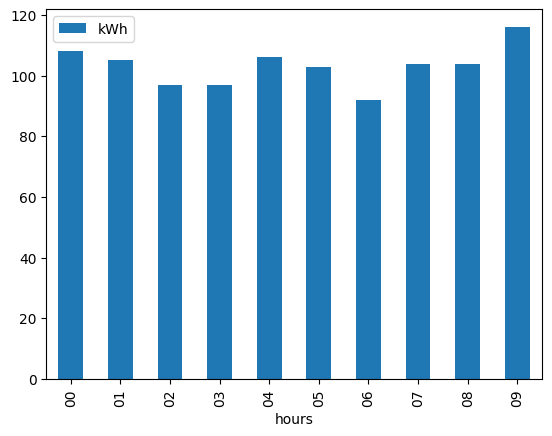

In [1361]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [1362]:
df_grp

,kWh
days,
21/08/23,0.858
22/08/23,3.700
23/08/23,4.230
24/08/23,3.686
25/08/23,4.193
...,...
08/11/24,4.026
09/11/24,3.304
10/11/24,3.386


In [1363]:
# select number of days to display
span = 30
#df_grp.tail(span)


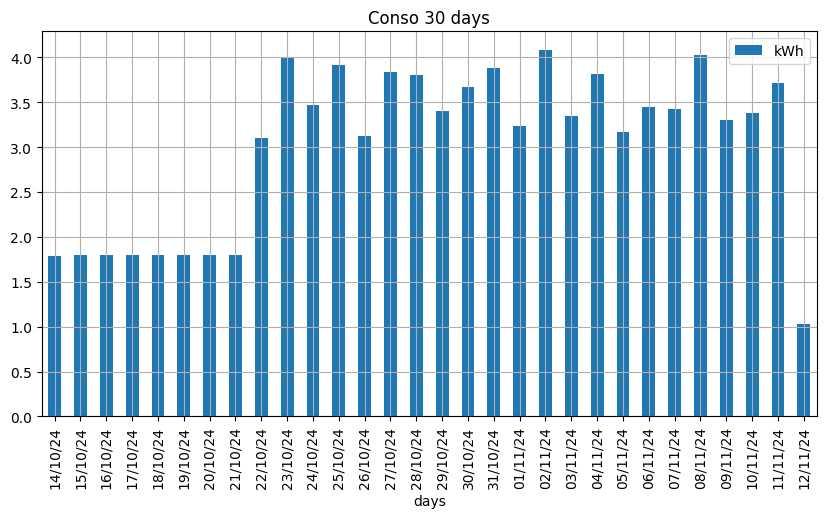

In [1364]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


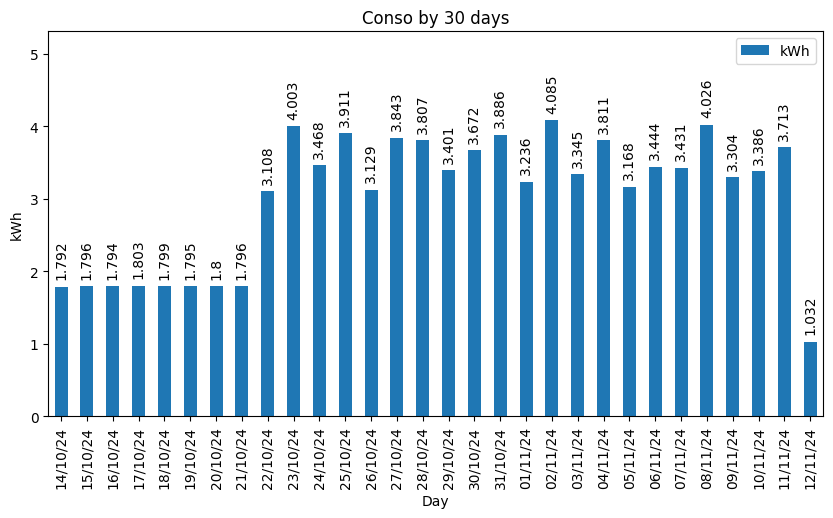

In [1365]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [1366]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
14/10/24    1.792
15/10/24    1.796
16/10/24    1.794
17/10/24    1.803
18/10/24    1.799
19/10/24    1.795
20/10/24    1.800
21/10/24    1.796
22/10/24    3.108
23/10/24    4.003
24/10/24    3.468
25/10/24    3.911
26/10/24    3.129
27/10/24    3.843
28/10/24    3.807
29/10/24    3.401
30/10/24    3.672
31/10/24    3.886
01/11/24    3.236
02/11/24    4.085
03/11/24    3.345
04/11/24    3.811
05/11/24    3.168
06/11/24    3.444
07/11/24    3.431
08/11/24    4.026
09/11/24    3.304
10/11/24    3.386
11/11/24    3.713
12/11/24    1.032
Name: kWh, dtype: float64

In [1367]:
x_labels=df_grp.tail(span).index
x_labels

Index(['14/10/24', '15/10/24', '16/10/24', '17/10/24', '18/10/24', '19/10/24',
       '20/10/24', '21/10/24', '22/10/24', '23/10/24', '24/10/24', '25/10/24',
       '26/10/24', '27/10/24', '28/10/24', '29/10/24', '30/10/24', '31/10/24',
       '01/11/24', '02/11/24', '03/11/24', '04/11/24', '05/11/24', '06/11/24',
       '07/11/24', '08/11/24', '09/11/24', '10/11/24', '11/11/24', '12/11/24'],
      dtype='object', name='days')

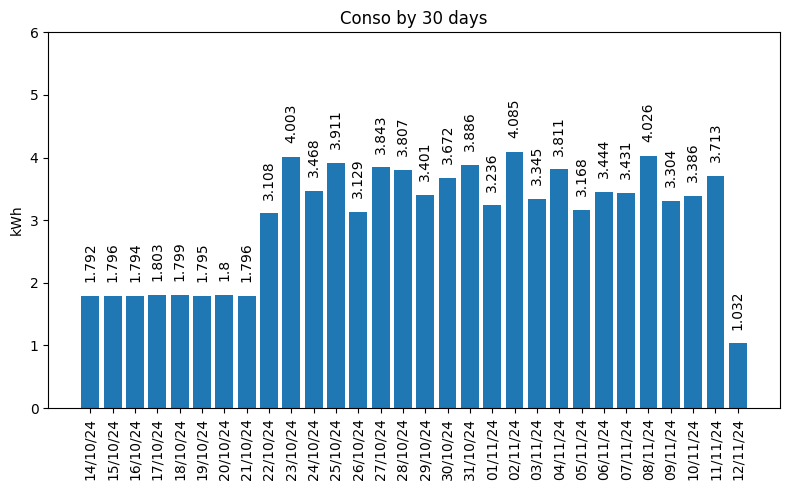

In [1368]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [1369]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

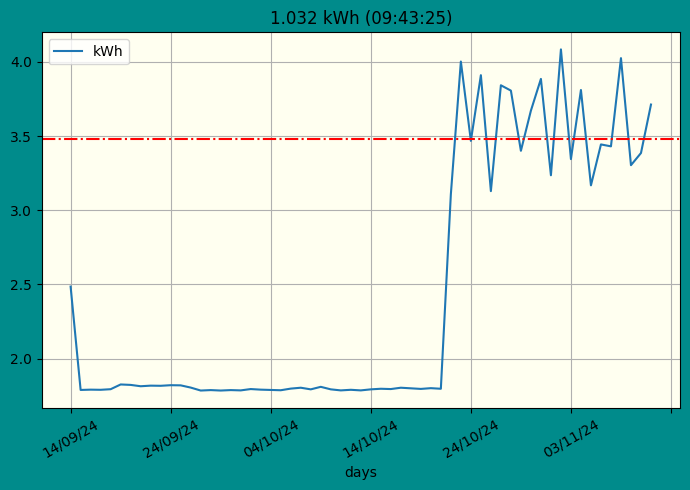

In [1370]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

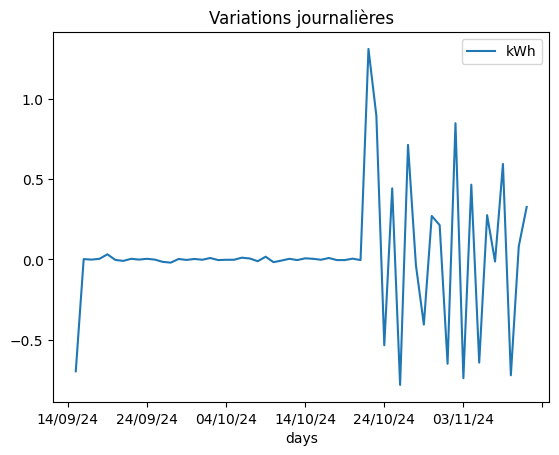

In [1371]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [1372]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:54:00.720101,21/08/23,18
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:54:22.578101,21/08/23,18
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:54:44.579101,21/08/23,18
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:55:06.507101,21/08/23,18
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:55:28.398101,21/08/23,18
...,...,...,...,...,...,...,...,...
1565316,1575,2.29,1.575,2285.714286,38760520501,2024-11-12 09:42:19.287101,12/11/24,09
1565317,1576,2.28,1.576,2284.263959,38760522077,2024-11-12 09:42:20.863101,12/11/24,09
1565318,1577,2.28,1.577,2282.815472,38760523654,2024-11-12 09:42:22.440101,12/11/24,09
1565319,9746,0.37,9.746,369.382311,38760533400,2024-11-12 09:42:32.186101,12/11/24,09


In [1373]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [1374]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [1375]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [1376]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1377]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,858
22/08/23,3700
23/08/23,4230
24/08/23,3686
25/08/23,4193
...,...
08/11/24,4026
09/11/24,3304
10/11/24,3386


In [1378]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:54:00.720101,21/08/23,18
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:54:22.578101,21/08/23,18
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:54:44.579101,21/08/23,18
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:55:06.507101,21/08/23,18
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:55:28.398101,21/08/23,18
...,...,...,...,...,...,...,...,...
1565316,1575,2.29,1.575,2285.714286,38760520501,2024-11-12 09:42:19.287101,12/11/24,09
1565317,1576,2.28,1.576,2284.263959,38760522077,2024-11-12 09:42:20.863101,12/11/24,09
1565318,1577,2.28,1.577,2282.815472,38760523654,2024-11-12 09:42:22.440101,12/11/24,09
1565319,9746,0.37,9.746,369.382311,38760533400,2024-11-12 09:42:32.186101,12/11/24,09


In [1379]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 18    0        21/08/23    18  0.16
               1        21/08/23    18  0.16
               2        21/08/23    18  0.16
               3        21/08/23    18  0.16
               4        21/08/23    18  0.16
...                          ...   ...   ...
12/11/24 09    1565316  12/11/24    09  2.29
               1565317  12/11/24    09  2.28
               1565318  12/11/24    09  2.28
               1565319  12/11/24    09  0.37
               1565320  12/11/24    09  0.13

[1565321 rows x 3 columns]

In [1380]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [1381]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '18'), ('21/08/23', '19'), ('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '18'), ('22/08/23', '19'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('23/08/23', '18'), ('23/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/2

In [1382]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,858,858
22/08/23,3700,3700
23/08/23,4230,4230
24/08/23,3686,3686
25/08/23,4193,4193
...,...,...
08/11/24,4026,4026
09/11/24,3304,3304
10/11/24,3386,3386


In [1383]:
grp_by_day['kWh'].cumsum()

days
21/08/23        858
22/08/23       4558
23/08/23       8788
24/08/23      12474
25/08/23      16667
             ...   
08/11/24    1553886
09/11/24    1557190
10/11/24    1560576
11/11/24    1564289
12/11/24    1565321
Name: kWh, Length: 450, dtype: int64

In [1384]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 18      17
         19     173
         20     278
         21     129
         22     130
...             ...
12/11/24 05     103
         06      92
         07     104
         08     104
         09     116

[10768 rows x 1 columns]

In [1385]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  18            17
          19           190
          20           468
          21           597
          22           727
                    ...   
12/11/24  05       1564905
          06       1564997
          07       1565101
          08       1565205
          09       1565321
Name: kWh, Length: 10768, dtype: int64

In [1386]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 18      17      17    NaN
         19     173     190  156.0
         20     278     468  105.0
         21     129     597 -149.0
         22     130     727    1.0
...             ...     ...    ...
12/11/24 05     103     616   -3.0
         06      92     708  -11.0
         07     104     812   12.0
         08     104     916    0.0
         09     116    1032   12.0

[10768 rows x 3 columns]

In [1387]:
today, grp_by_dayhours.loc[today]

('12/11/24',
        kWh  cumsum  diff
 hours                   
 00     108     108   NaN
 01     105     213  -3.0
 02      97     310  -8.0
 03      97     407   0.0
 04     106     513   9.0
 05     103     616  -3.0
 06      92     708 -11.0
 07     104     812  12.0
 08     104     916   0.0
 09     116    1032  12.0)

Text(0.5, 1.0, 'Cumul journalier')

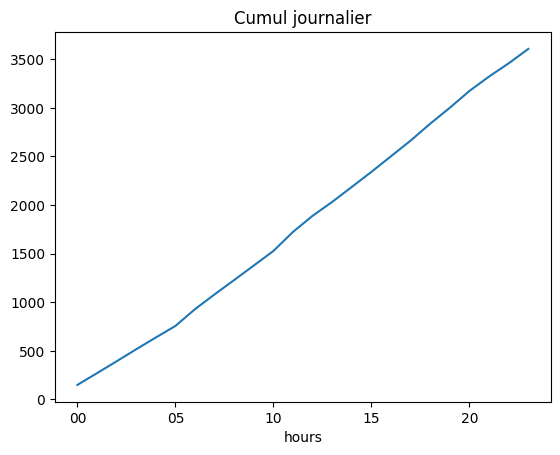

In [1388]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

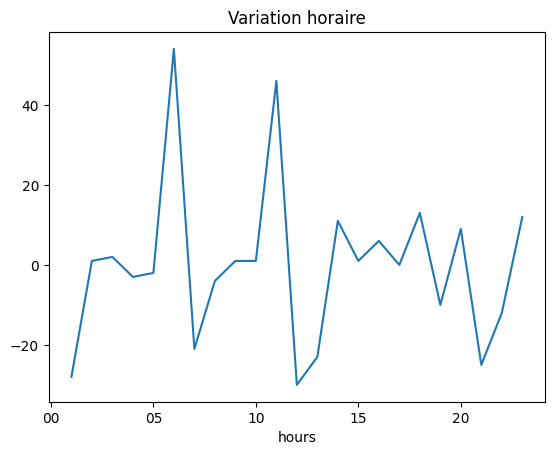

In [1389]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [1390]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

450

In [1391]:
df_grp.tail(n)['kWh'].describe()


count    450.000000
mean       3.478491
std        0.718487
min        0.858000
25%        3.336500
50%        3.614500
75%        3.881500
max        5.133000
Name: kWh, dtype: float64

In [1392]:
maxday = df_grp.tail(n)['kWh'].idxmax()

Text(0.5, 1.0, '450 days')

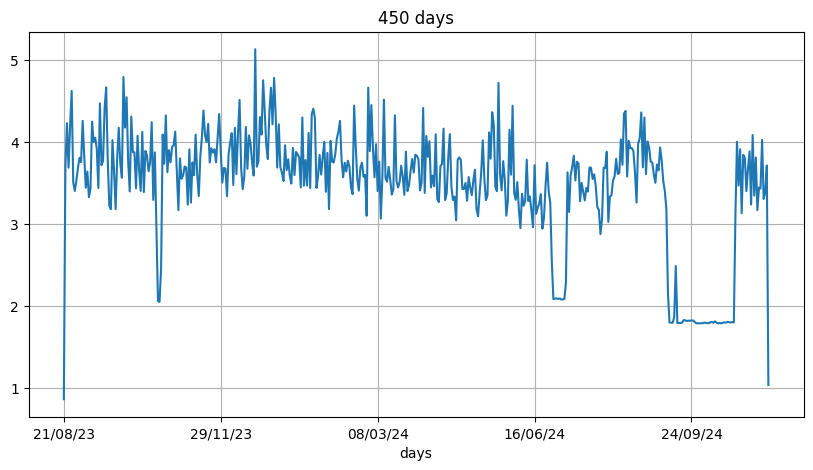

In [1393]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '100 days')

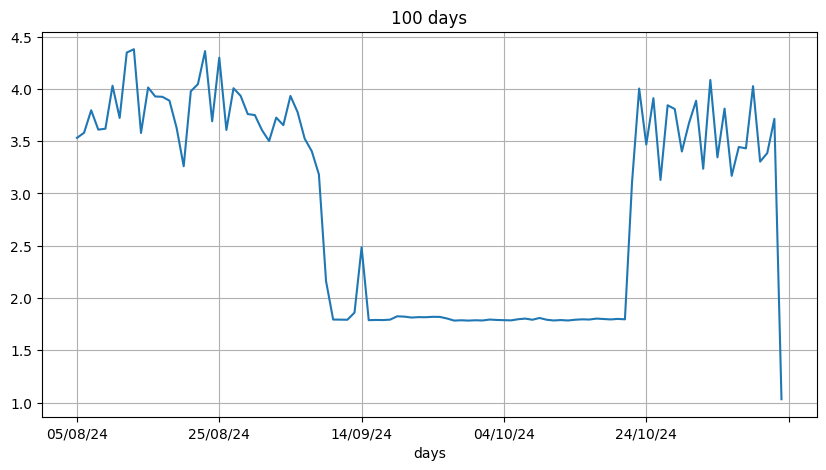

In [1394]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [1395]:
df_grp['kWh']

days
21/08/23    0.858
22/08/23    3.700
23/08/23    4.230
24/08/23    3.686
25/08/23    4.193
            ...  
08/11/24    4.026
09/11/24    3.304
10/11/24    3.386
11/11/24    3.713
12/11/24    1.032
Name: kWh, Length: 450, dtype: float64

In [1396]:
df_grp.describe()

,kWh
count,450.000000
mean,3.478491
std,0.718487
min,0.858000
25%,3.336500
50%,3.614500
75%,3.881500
max,5.133000


array([[<Axes: title={'center': 'kWh'}>]], dtype=object)

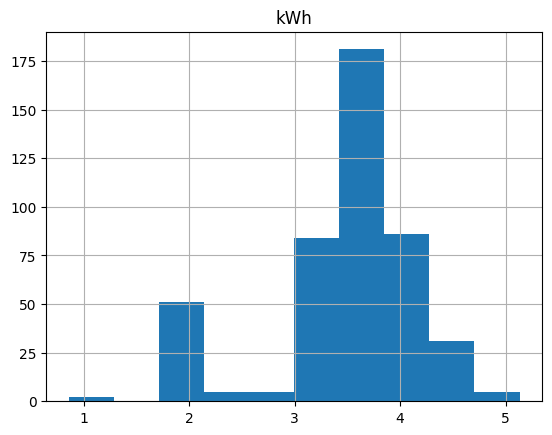

In [1397]:
# 
df_grp.hist()

In [1398]:
df_grp.tail(span)['kWh']

days
05/08/24    3.531
06/08/24    3.580
07/08/24    3.795
08/08/24    3.610
09/08/24    3.619
            ...  
08/11/24    4.026
09/11/24    3.304
10/11/24    3.386
11/11/24    3.713
12/11/24    1.032
Name: kWh, Length: 100, dtype: float64

# Conso par heure

In [1399]:
day

'12/11/24'

In [1400]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,108,108,NaN
01,105,213,-3.0
02,97,310,-8.0
03,97,407,0.0
04,106,513,9.0
05,103,616,-3.0
06,92,708,-11.0
07,104,812,12.0
08,104,916,0.0


In [1401]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


10

In [1402]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 11)

In [1403]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [1404]:
grp_by_dayhours.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [1405]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
Name: days, dtype: float64

In [1406]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [1407]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 00 to 09
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     10 non-null     int64  
 1   cumsum  10 non-null     int64  
 2   diff    9 non-null      float64
 3   days    10 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 400.0+ bytes


In [1408]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
Name: days, dtype: float64

In [1409]:
day

'12/11/24'

In [1410]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,108,108,NaN,1.0
01,105,213,-3.0,2.0
02,97,310,-8.0,3.0
03,97,407,0.0,4.0
04,106,513,9.0,5.0
05,103,616,-3.0,6.0
06,92,708,-11.0,7.0
07,104,812,12.0,8.0
08,104,916,0.0,9.0


Text(0.5, 1.0, '12/11/24')

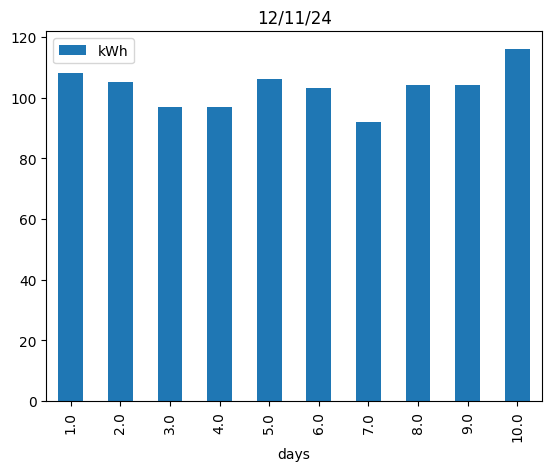

In [1411]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [1412]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09'], dtype='object', name='hours')

# Conso du jour


In [1413]:
groupedbyhour.count()

,kWh
hours,
00,108
01,105
02,97
03,97
04,106
05,103
06,92
07,104
08,104


In [1414]:
day = '09/09/24'
day = maxday
#day = today
grp_by_dayhours.loc[day].kWh

hours
00    168
01    161
02    158
03    167
04    145
05    131
06    130
07    114
08    131
09    115
10    130
11    130
12    174
13    157
14    149
15    567
16    565
17    251
18    307
19    282
20    319
21    320
22    192
23    170
Name: kWh, dtype: int64

In [1415]:
def conso_by_hour(day):
    global data
    # conso by hour
    #data = groupedbyhour.count().kWh
    data = grp_by_dayhours.loc[day].kWh

    # len(groupedbyhour)
    x = np.arange(1,len(data)+1)
    ymax = max(data)+5
    #groupedbyhour.count().plot(grid=True,xticks=x)
    fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

    plt.bar(x,data)
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) {day} - Total {sum(data)}')
    plt.xlim(0,len(x)+1)
    #plt.xticks(rotation=30);
    #plt.ylim(0,ymax)

    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in data]
    fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
            fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
        )


# Today

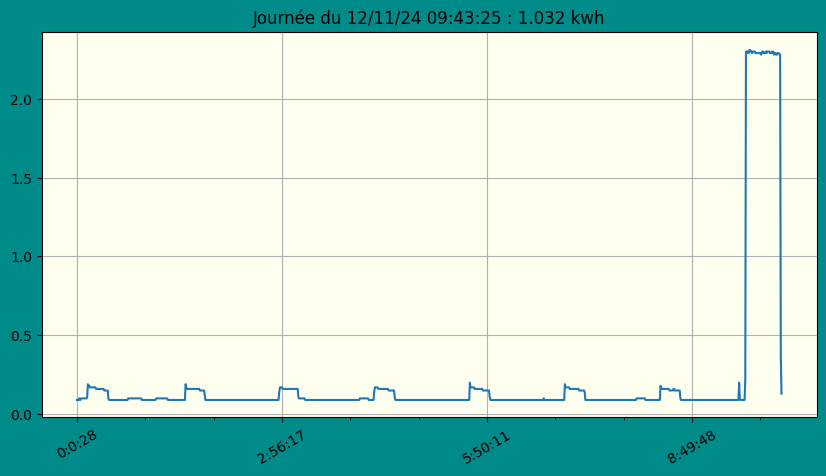

In [1416]:
show(today,bgcolor='ivory')

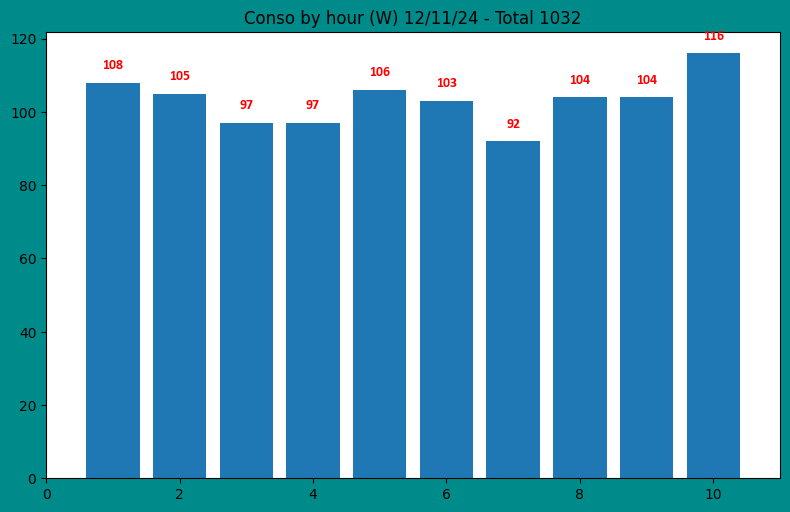

In [1417]:
conso_by_hour(today)

('21/12/23', None)

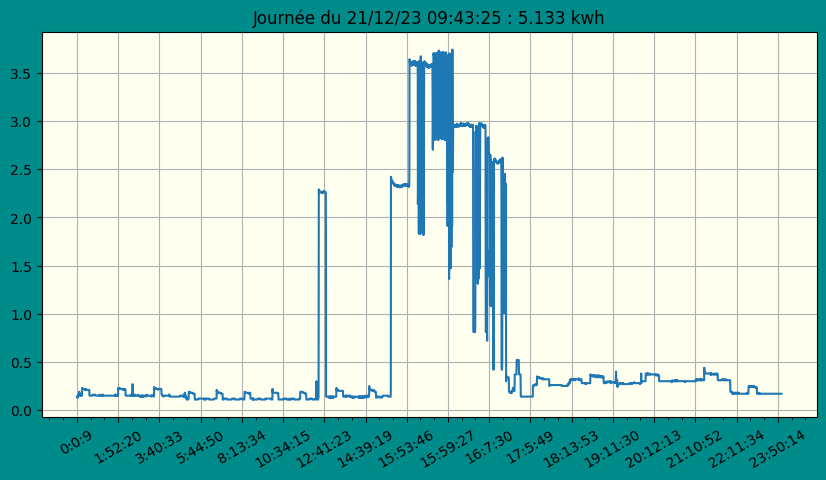

In [1418]:
day, show(day,bgcolor='ivory')

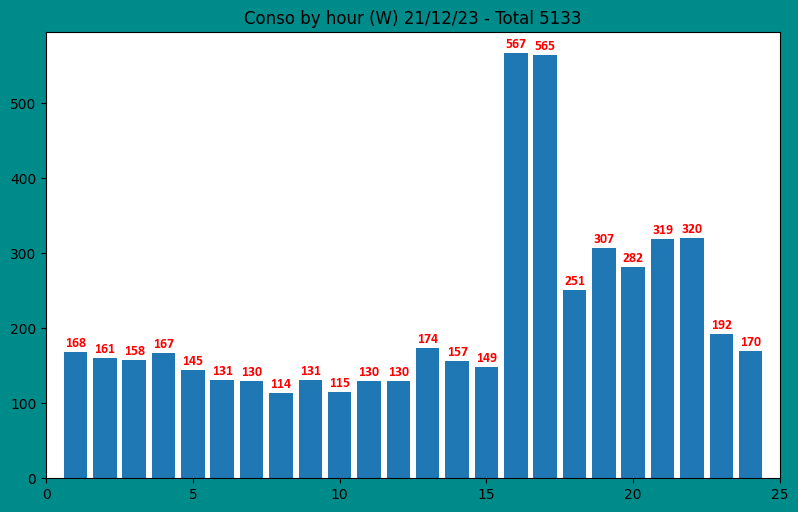

In [1419]:
conso_by_hour(day)

('21/12/23', None)

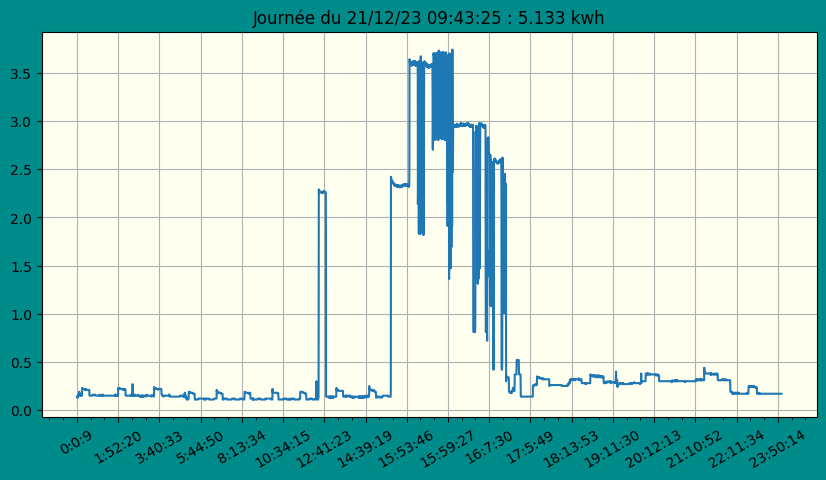

In [1420]:
# retour vietnam 22/10/2024
day = '22/10/24'
day = maxday
day, show(day,bgcolor='ivory')

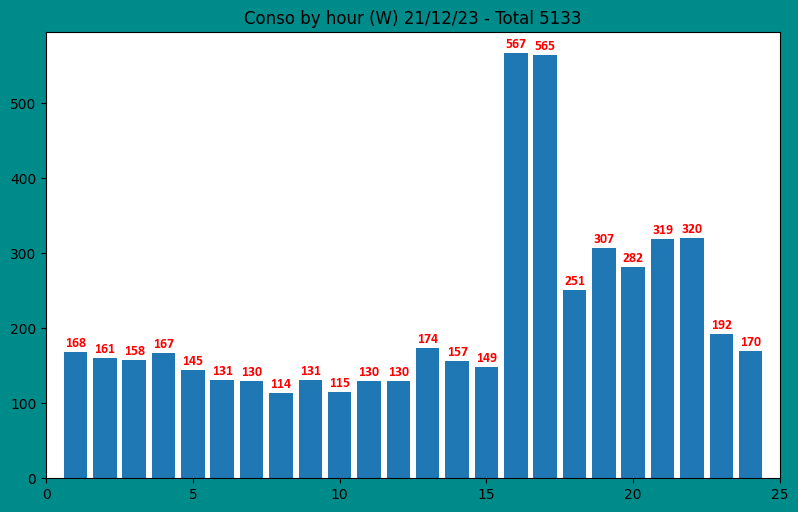

In [1421]:
conso_by_hour(day)

In [1422]:
sum(data)

5133

In [1423]:
diff = grp_by_dayhours.loc[today]
diff


,kWh,cumsum,diff,days
hours,,,,
00,108,108,NaN,1.0
01,105,213,-3.0,2.0
02,97,310,-8.0,3.0
03,97,407,0.0,4.0
04,106,513,9.0,5.0
05,103,616,-3.0,6.0
06,92,708,-11.0,7.0
07,104,812,12.0,8.0
08,104,916,0.0,9.0


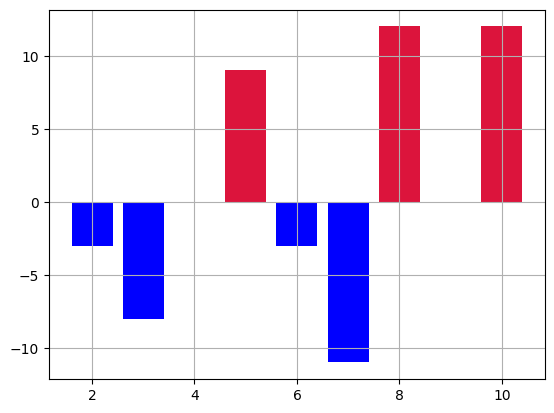

In [1424]:
x = np.arange(1,len(diff)+1)

plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

In [1425]:
data

hours
00    168
01    161
02    158
03    167
04    145
05    131
06    130
07    114
08    131
09    115
10    130
11    130
12    174
13    157
14    149
15    567
16    565
17    251
18    307
19    282
20    319
21    320
22    192
23    170
Name: kWh, dtype: int64

<Axes: xlabel='hours'>

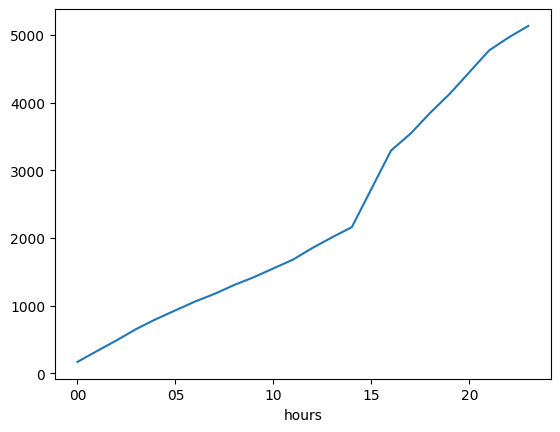

In [1426]:
data.cumsum().plot()


<Axes: xlabel='hours'>

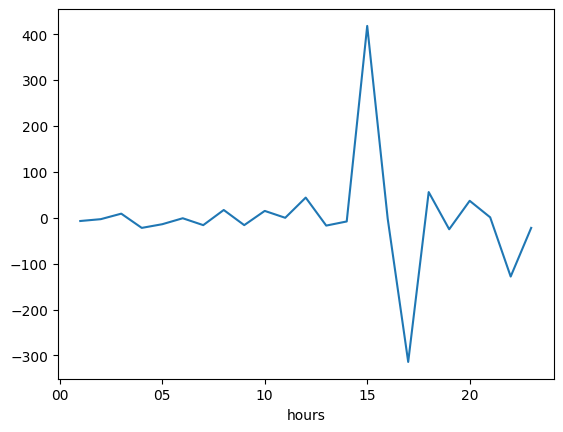

In [1427]:
# evolution par heure
data.diff().plot()

In [1428]:
data.diff().describe()

count     23.000000
mean       0.086957
std      116.669273
min     -314.000000
25%      -16.500000
50%       -3.000000
75%       12.000000
max      418.000000
Name: kWh, dtype: float64

<Axes: >

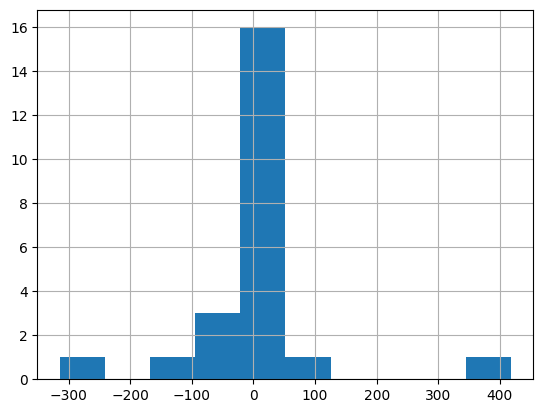

In [1429]:
data.diff().hist()

# Test sauvegarde

In [1430]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipy

In [1431]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [1432]:
#conso_byhour(day)

In [1433]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

# plot any day


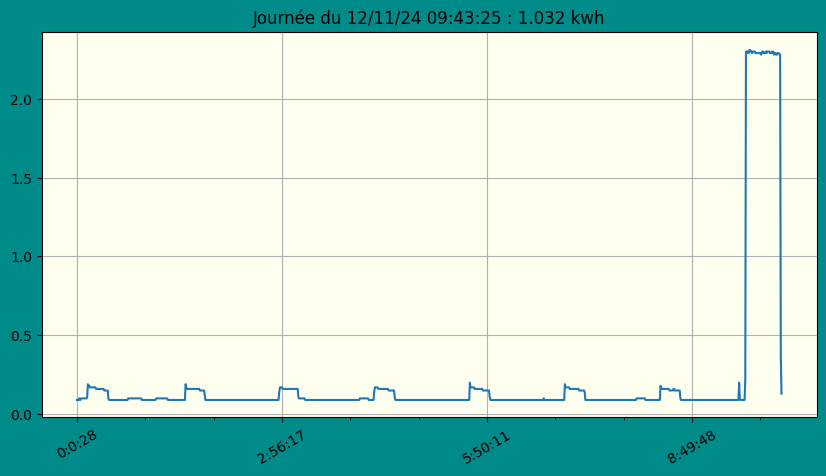

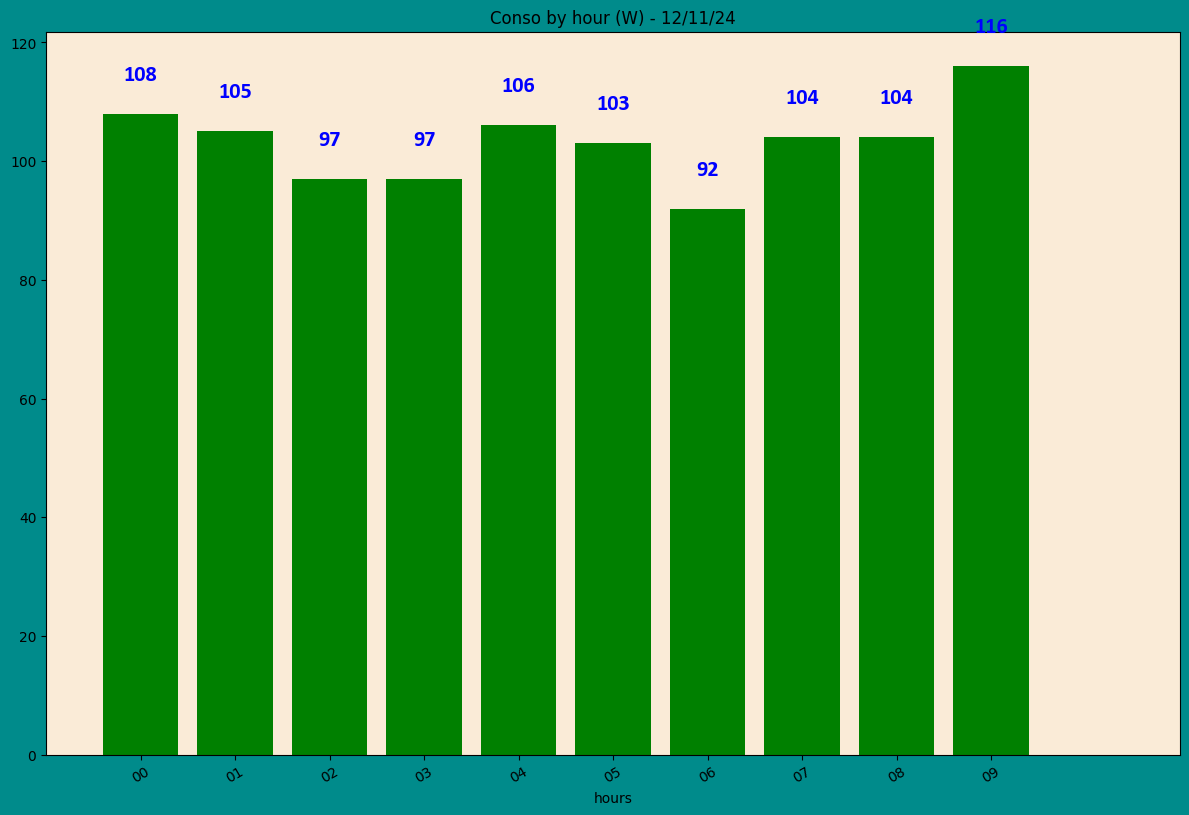

In [1434]:
day = '27/10/24'
day = today
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [1435]:
month.describe()


count    30.000000
mean      3.044567
std       0.872226
min       1.785000
25%       1.800750
50%       3.365500
75%       3.783500
max       4.085000
Name: kWh, dtype: float64

<Axes: >

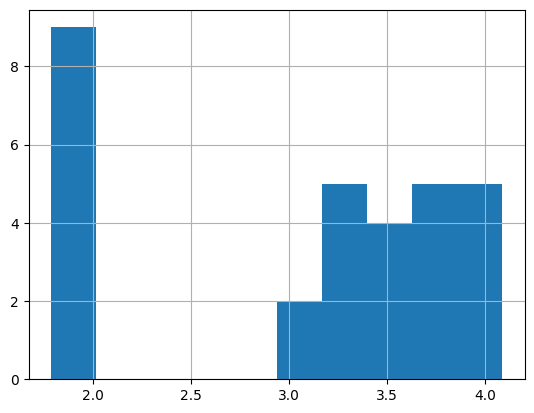

In [1436]:
month.hist()

<Axes: xlabel='days'>

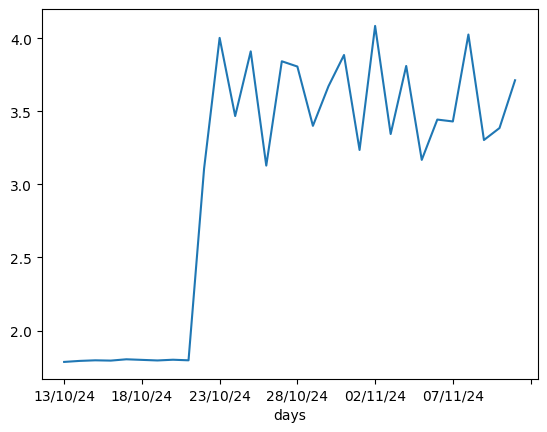

In [1437]:
month.plot()

In [1438]:
# date with max conso in 1 month
month.idxmax()

'02/11/24'

In [1439]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'02/11/24'

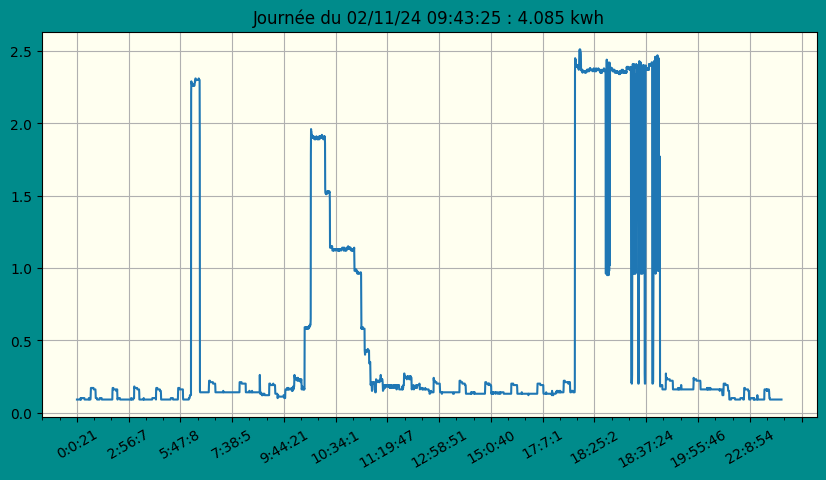

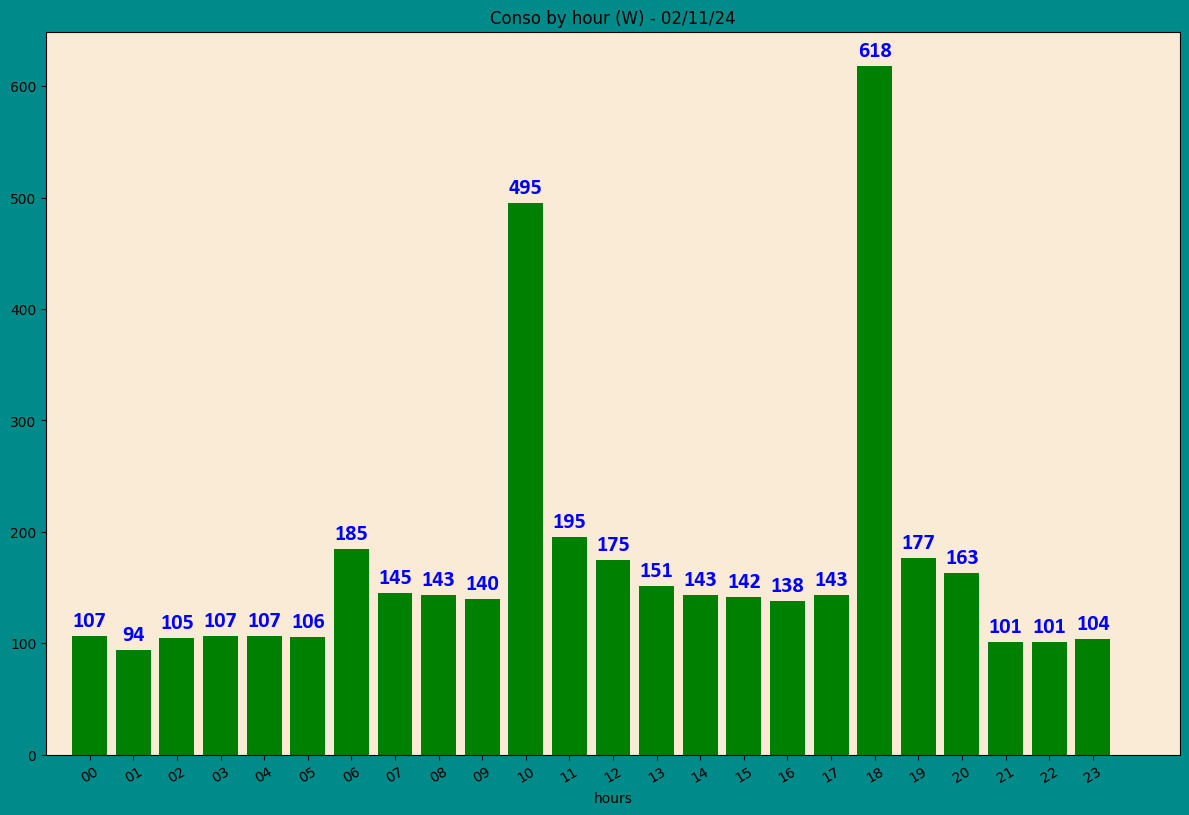

In [1440]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [1441]:
grp_by_dayhours

kWh  cumsum   diff  days
days     hours                          
21/08/23 18      17      17    NaN   NaN
         19     173     190  156.0   NaN
         20     278     468  105.0   NaN
         21     129     597 -149.0   NaN
         22     130     727    1.0   NaN
...             ...     ...    ...   ...
12/11/24 05     103     616   -3.0   6.0
         06      92     708  -11.0   7.0
         07     104     812   12.0   8.0
         08     104     916    0.0   9.0
         09     116    1032   12.0  10.0

[10768 rows x 4 columns]

In [1442]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,107,107,NaN,NaN
01,94,201,-13.0,NaN
02,105,306,11.0,NaN
03,107,413,2.0,NaN
04,107,520,0.0,NaN
05,106,626,-1.0,NaN
06,185,811,79.0,NaN
07,145,956,-40.0,NaN
08,143,1099,-2.0,NaN


In [1443]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

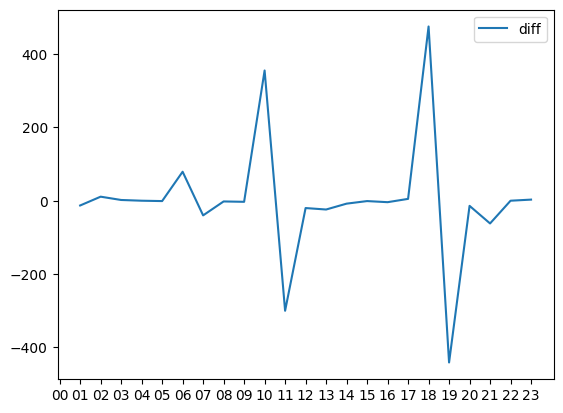

In [1444]:
# diff
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

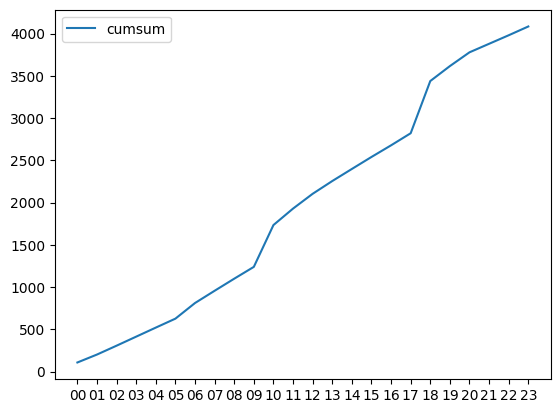

In [1445]:
# cumsum
plt.plot(grp_by_dayhours.loc[month.idxmax()]['cumsum'],label=grp_by_dayhours.columns[1])
plt.legend()

In [1446]:
# 41 s
# file to big to git sync

# create .gitignore
filename=r'../conso_data.csv'
#conso_data.to_csv(filename)
#43.6s size 140128 kB